In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcdefaults()
plt.xkcd()

import scipy.stats as stats
from scipy.stats import ttest_ind, f_oneway

%matplotlib inline

In [ ]:
df = pd.read_excel("salesdata.xlsx")

In [ ]:
df.head()

,ShopCode,ShopPlace,OrderDate,SalesType,SalesOrderNo,Quantity,UnitOfMeasurement,TotalPrice,UnitPrice,customeraddress,ProductNo,ProductDescription,ProductGroup,productgroup1,productgroup2,productgroup3,customercity,CountryCode,vatamount
0,CAB0003,Gent,2020-10-16 20:23:31,SalesOrderType.shop-sale,126076,0.105,uom.vp,2.64,23.7143,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.15
1,CAB0003,Gent,2020-10-16 15:06:52,SalesOrderType.shop-sale,126049,0.200,uom.vp,5.02,23.7000,-,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,-,BE,0.28
2,CAB0003,Gent,2020-10-19 15:07:16,SalesOrderType.shop-sale,126139,0.250,uom.vp,6.28,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36
3,CAB0003,Gent,2020-10-27 13:23:39,SalesOrderType.shop-sale,126395,0.250,uom.vp,6.28,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36
4,CAB0003,Gent,2020-10-26 19:07:25,SalesOrderType.shop-sale,126387,0.250,uom.vp,6.28,23.6800,Francois bernadstraat 20,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,Gent,BE,0.36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57031 entries, 0 to 57030
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   ShopCode            57031 non-null  object        
 1   ShopPlace           57031 non-null  object        
 2   OrderDate           57031 non-null  datetime64[ns]
 3   SalesType           57031 non-null  object        
 4   SalesOrderNo        57031 non-null  object        
 5   Quantity            57031 non-null  float64       
 6   UnitOfMeasurement   57031 non-null  object        
 7   TotalPrice          57031 non-null  float64       
 8   UnitPrice           57031 non-null  float64       
 9   customeraddress     56009 non-null  object        
 10  ProductNo           57031 non-null  object        
 11  ProductDescription  57029 non-null  object        
 12  ProductGroup        57029 non-null  object        
 13  productgroup1       49140 non-null  object    

In [ ]:
df.describe()

,Quantity,TotalPrice,UnitPrice,vatamount
count,57031.000000,57031.000000,57031.000000,56897.000000
mean,0.702690,8.524979,32.424512,0.635359
std,2.066985,8.655698,29.526062,0.986288
min,-2.000000,-82.880000,-135.300000,-6.070000
25%,0.110000,4.000000,4.660000,0.240000
50%,0.250000,6.400000,29.850000,0.380000
75%,1.000000,8.980000,52.200000,0.560000
max,300.000000,450.000000,420.000000,25.470000


In [ ]:
# Convert the date to type date time
df['OrderDate']= pd.to_datetime(df['OrderDate'])

# add column hour
df['hour']= pd.to_datetime(df['OrderDate']).dt.hour

In [ ]:
def get_part_of_day(hour):
    return (
        "morning" if 5 <= hour <= 11
        else
        "afternoon" if 12 <= hour <= 17
        else
        "evening" if 18 <= hour <= 22
        else
        "night"
    )

In [ ]:
#conver hour as part of day
df['part_of_day'] = df['hour'].apply(get_part_of_day)

In [ ]:
df.head()

,ShopCode,ShopPlace,OrderDate,SalesType,SalesOrderNo,Quantity,UnitOfMeasurement,TotalPrice,UnitPrice,customeraddress,ProductNo,ProductDescription,ProductGroup,productgroup1,productgroup2,productgroup3,customercity,CountryCode,vatamount,hour,part_of_day
0,CAB0003,Gent,2020-10-16 20:23:31,SalesOrderType.shop-sale,126076,0.105,uom.vp,2.64,23.7143,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.15,20,evening
1,CAB0003,Gent,2020-10-16 15:06:52,SalesOrderType.shop-sale,126049,0.200,uom.vp,5.02,23.7000,-,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,-,BE,0.28,15,afternoon
2,CAB0003,Gent,2020-10-19 15:07:16,SalesOrderType.shop-sale,126139,0.250,uom.vp,6.28,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,15,afternoon
3,CAB0003,Gent,2020-10-27 13:23:39,SalesOrderType.shop-sale,126395,0.250,uom.vp,6.28,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,13,afternoon
4,CAB0003,Gent,2020-10-26 19:07:25,SalesOrderType.shop-sale,126387,0.250,uom.vp,6.28,23.6800,Francois bernadstraat 20,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,Gent,BE,0.36,19,evening


In [ ]:
# make quantity values as positive
df['Quantity'] = df['Quantity'].apply(lambda x: (x * -1) if x < 0 else x*1)
# make Unit price values as positive
df['UnitPrice'] = df['UnitPrice'].apply(lambda x: (x * -1) if x < 0 else x*1)
# make vat amount values as positive
df['vatamount'] = df['vatamount'].apply(lambda x: (x * -1) if x < 0 else x*1)

In [ ]:
df.vatamount.fillna(0.0, inplace=True)

In [ ]:
def total(unit_price, quantity, vat):
    total_price = unit_price * quantity + vat
    return total_price

In [ ]:
#add column total
df['TotalPrice'] = df.apply(lambda x: total(x.UnitPrice, x.Quantity, x.vatamount), axis=1)

In [ ]:
df.describe()

,Quantity,TotalPrice,UnitPrice,vatamount,hour
count,57031.000000,57031.000000,57031.000000,57031.000000,57031.000000
mean,0.705779,8.324446,32.457358,0.639536,15.568235
std,2.065932,12.415122,29.489951,0.981940,2.864789
min,0.001000,0.000000,0.000000,0.000000,0.000000
25%,0.115000,4.000000,4.715000,0.240000,13.000000
50%,0.250000,6.200000,29.850000,0.380000,16.000000
75%,1.000000,8.790000,52.200000,0.560000,18.000000
max,300.000000,2169.280000,420.000000,25.470000,23.000000


In [ ]:
df.head()

,ShopCode,ShopPlace,OrderDate,SalesType,SalesOrderNo,Quantity,UnitOfMeasurement,TotalPrice,UnitPrice,customeraddress,ProductNo,ProductDescription,ProductGroup,productgroup1,productgroup2,productgroup3,customercity,CountryCode,vatamount,hour,part_of_day
0,CAB0003,Gent,2020-10-16 20:23:31,SalesOrderType.shop-sale,126076,0.105,uom.vp,2.640001,23.7143,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.15,20,evening
1,CAB0003,Gent,2020-10-16 15:06:52,SalesOrderType.shop-sale,126049,0.200,uom.vp,5.020000,23.7000,-,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,-,BE,0.28,15,afternoon
2,CAB0003,Gent,2020-10-19 15:07:16,SalesOrderType.shop-sale,126139,0.250,uom.vp,6.280000,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,15,afternoon
3,CAB0003,Gent,2020-10-27 13:23:39,SalesOrderType.shop-sale,126395,0.250,uom.vp,6.280000,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,13,afternoon
4,CAB0003,Gent,2020-10-26 19:07:25,SalesOrderType.shop-sale,126387,0.250,uom.vp,6.280000,23.6800,Francois bernadstraat 20,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,Gent,BE,0.36,19,evening


# Question 1

metrics that can be used to measure key indicators is metrics `TotalPrice`

In [ ]:
# groupe by product
datamart = df.groupby(['ProductDescription']).agg({
'TotalPrice': 'sum',
})

In [ ]:
datamart.sort_values('TotalPrice')

,TotalPrice
ProductDescription,
Cadeaubon,0.000000
Instant coffee Irish Cream,0.090000
Instant coffee Colombia,0.090000
Instant Coffee Hazelnut,0.180000
Lemongrass Flavoured coffee,0.496000
...,...
Coffee 2 Go Cappuccino Medium,5575.999600
Gimber 200 ml,9299.119992
Gimber 500 ml,9809.980105


based on sum of total sales
- the product `Gimber 700 ml` is the ```most successful```
- the product `Cadeaubon` is the ```least successful```

In [ ]:
# groupe by product group
datamart = df.groupby(['ProductGroup']).agg({
'TotalPrice': 'sum',
})

In [ ]:
datamart.sort_values('TotalPrice')

,TotalPrice
ProductGroup,
AfgewerkteICProducten,6.960000
ProductGroup.PAID_PACKAGING,1325.229304
CapsuleProducten,2541.590600
ProductGroup.TEA_CR,4123.309941
ProductGroup.SERVICE_CR,13904.368755
ProductGroup.DRINKS_2GO,27184.249700
ProductGroup.Gift,35981.209600
AfgewerkteProducten,36706.859425
ProductGroup.ACCESSOIRES,48199.259500


(array([     0.,  25000.,  50000.,  75000., 100000., 125000., 150000.,
        175000., 200000.]), <a list of 9 Text major ticklabel objects>)

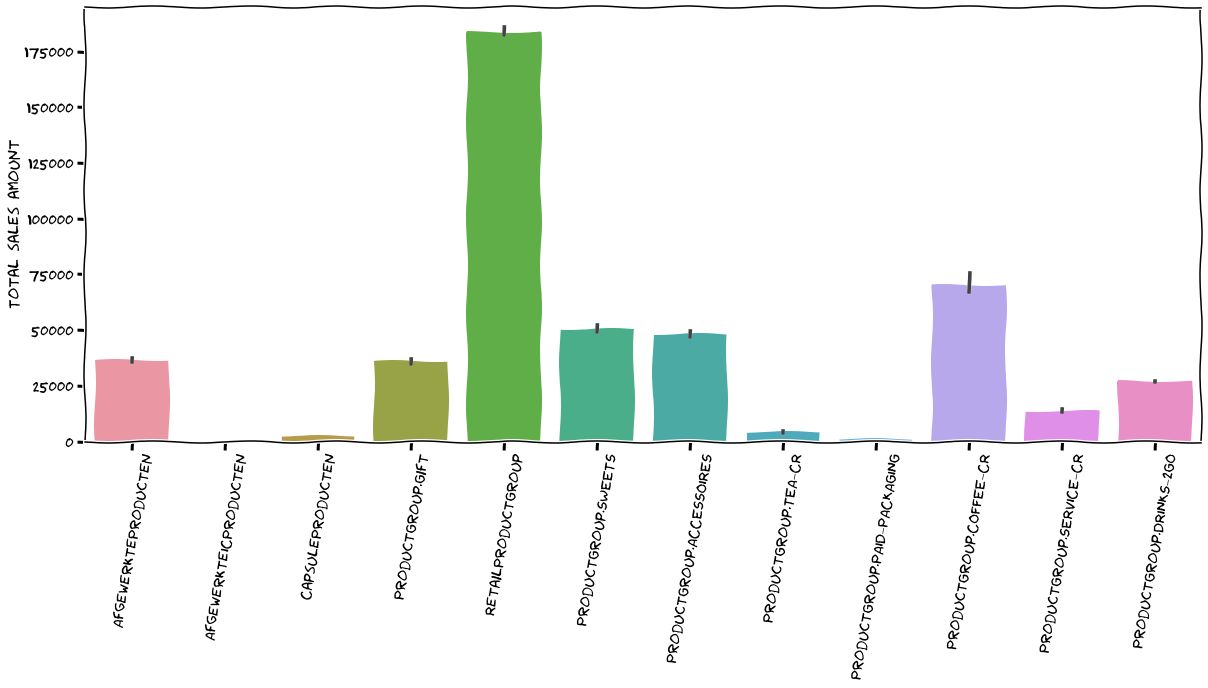

In [ ]:
plt.figure(figsize=(20,8))
sns.barplot(x=df.ProductGroup, y=df.TotalPrice, estimator=np.sum)

plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15, rotation=80)
plt.ylabel('Total sales amount', fontsize=16)
plt.yticks(fontsize=15)

based on sum of total sales
- the ProductGroup `RetailProductGroup` is the ```most successful```
- the ProductGroup `AfgewerkteICProducten` is the ```least successful```

In [ ]:
# groupe by product group
datamart = df.groupby(['ProductDescription']).agg({
'TotalPrice': 'sum',
})

In [ ]:
top5 = datamart[:5].index.tolist()

In [ ]:
df1 = df[df.ProductDescription.isin(top5)][['ProductDescription', 'TotalPrice', 'Quantity', 'UnitPrice']]

In [ ]:
df1

,ProductDescription,TotalPrice,Quantity,UnitPrice
10902,8 Treasures of the Shaolin (91281),1.139000,0.100,7.2900
10903,8 Treasures of the Shaolin (91281),5.749997,0.110,49.2727
10904,8 Treasures of the Shaolin (91281),2.090000,0.050,39.4000
10905,8 Treasures of the Shaolin (91281),6.540000,0.125,49.3600
10906,8 Treasures of the Shaolin (91281),3.139998,0.060,49.3333
...,...,...,...,...
45988,AERTS Josien Broeren Dessert Bord,29.950000,1.000,24.7500
45989,AERTS Josien Broeren Dessert Bord,29.950000,1.000,24.7500
56977,%iced%tea%waasland%,39.950000,1.000,37.6900
56978,%iced%tea%waasland%,39.950000,1.000,37.6900


In [ ]:
df1.sort_values('TotalPrice')

,ProductDescription,TotalPrice,Quantity,UnitPrice
10929,8 Treasures of the Shaolin (91281),1.027,0.1,6.57
10966,8 Treasures of the Shaolin (91281),1.027,0.1,6.57
10909,8 Treasures of the Shaolin (91281),1.027,0.1,6.57
10919,8 Treasures of the Shaolin (91281),1.139,0.1,7.29
10918,8 Treasures of the Shaolin (91281),1.139,0.1,7.29
...,...,...,...,...
45988,AERTS Josien Broeren Dessert Bord,29.950,1.0,24.75
45989,AERTS Josien Broeren Dessert Bord,29.950,1.0,24.75
56977,%iced%tea%waasland%,39.950,1.0,37.69
56978,%iced%tea%waasland%,39.950,1.0,37.69


In [ ]:
df1.ProductDescription.unique()

array(['8 Treasures of the Shaolin (91281)', '100G Can Cantata',
       'ASIA Theepot 0,35l gietijzer zwart',
       'AERTS Josien Broeren Dessert Bord', '%iced%tea%waasland%'],
      dtype=object)

In [ ]:
# groupe by product group
df3 = df.groupby(['ProductDescription']).agg({
'TotalPrice': 'sum',
})

(array([  0.,  50., 100., 150., 200., 250., 300., 350., 400., 450.]),
 <a list of 10 Text major ticklabel objects>)

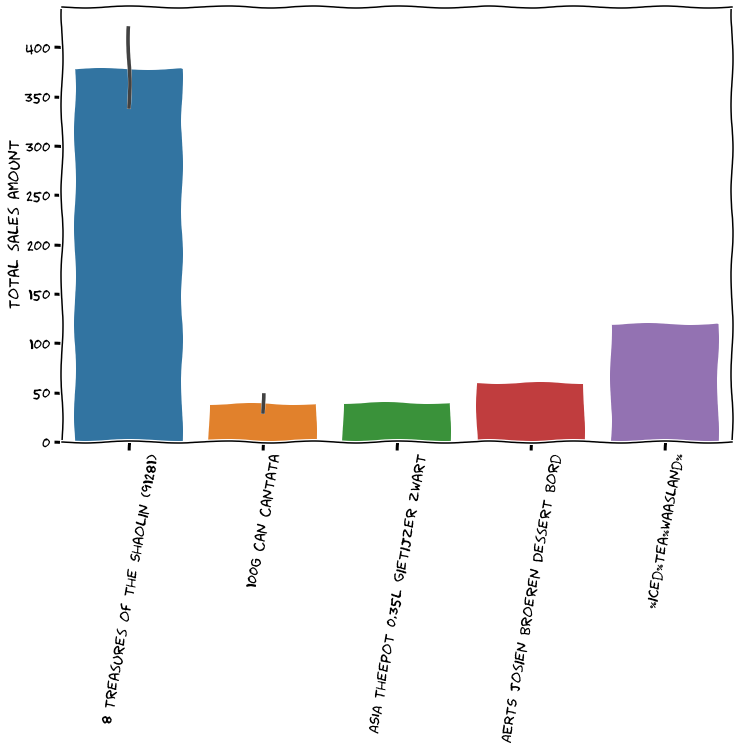

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df1.ProductDescription, y=df1.TotalPrice, estimator=np.sum)

plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15, rotation=80)
plt.ylabel('Total sales amount', fontsize=16)
plt.yticks(fontsize=15)

based on sum of total sales
- the product `8 Treasures of the Shaolin (91281)` is the ```1st rank```
- the product `%iced%tea%waasland%` is the ```5th rank```


8 Treasures of the Shaolin (91281)

In [ ]:
# groupe by location
datamart = df.groupby(['ShopPlace']).agg({
'TotalPrice': 'sum',
})

In [ ]:
datamart.sort_values('TotalPrice')

,TotalPrice
ShopPlace,
Nijvel,71493.740821
Waasland,81079.486728
Wijnegem,99844.922231
Woluwe,106141.905999
Gent,116191.410853


based on sum of total sales
- the location `Gent` is the ```most successful```
- the location `Nijvel` is the ```least successful```

### Evaluate the performance across all locations by Total selling amount

(array([     0.,  20000.,  40000.,  60000.,  80000., 100000., 120000.,
        140000.]), <a list of 8 Text major ticklabel objects>)

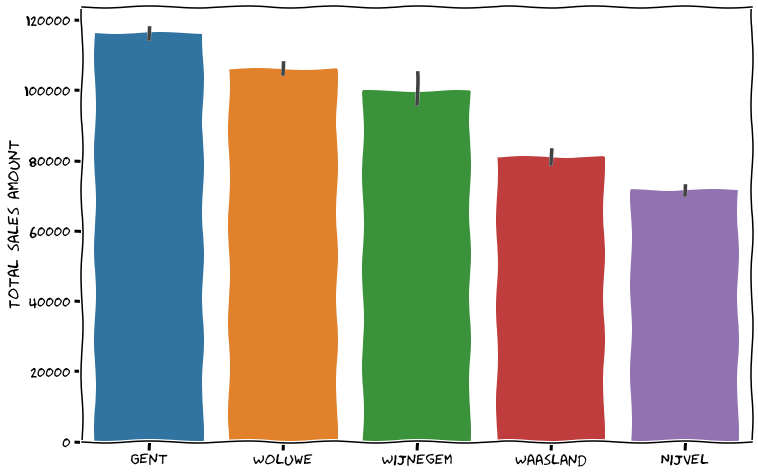

In [ ]:
plt.figure(figsize=(12,8))
sns.barplot(x=df.ShopPlace, y=df.TotalPrice, estimator=np.sum)

plt.xlabel('', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Total sales amount', fontsize=16)
plt.yticks(fontsize=15)

### Evaluate the performance across all locations by Total selling amount and product group

In [ ]:
df.groupby(['ShopPlace']).ProductGroup.value_counts().unstack(0)

ShopPlace,Gent,Nijvel,Waasland,Wijnegem,Woluwe
ProductGroup,,,,,
AfgewerkteICProducten,NaN,1.0,1.0,3.0,NaN
AfgewerkteProducten,1566.0,550.0,206.0,308.0,1608.0
CapsuleProducten,207.0,NaN,51.0,23.0,254.0
ProductGroup.ACCESSOIRES,519.0,693.0,571.0,667.0,713.0
ProductGroup.COFFEE_CR,760.0,1819.0,2179.0,2575.0,1224.0
ProductGroup.DRINKS_2GO,4914.0,605.0,NaN,NaN,783.0
ProductGroup.Gift,316.0,143.0,189.0,308.0,187.0
ProductGroup.PAID_PACKAGING,150.0,147.0,198.0,153.0,165.0
ProductGroup.SERVICE_CR,1423.0,70.0,35.0,91.0,287.0


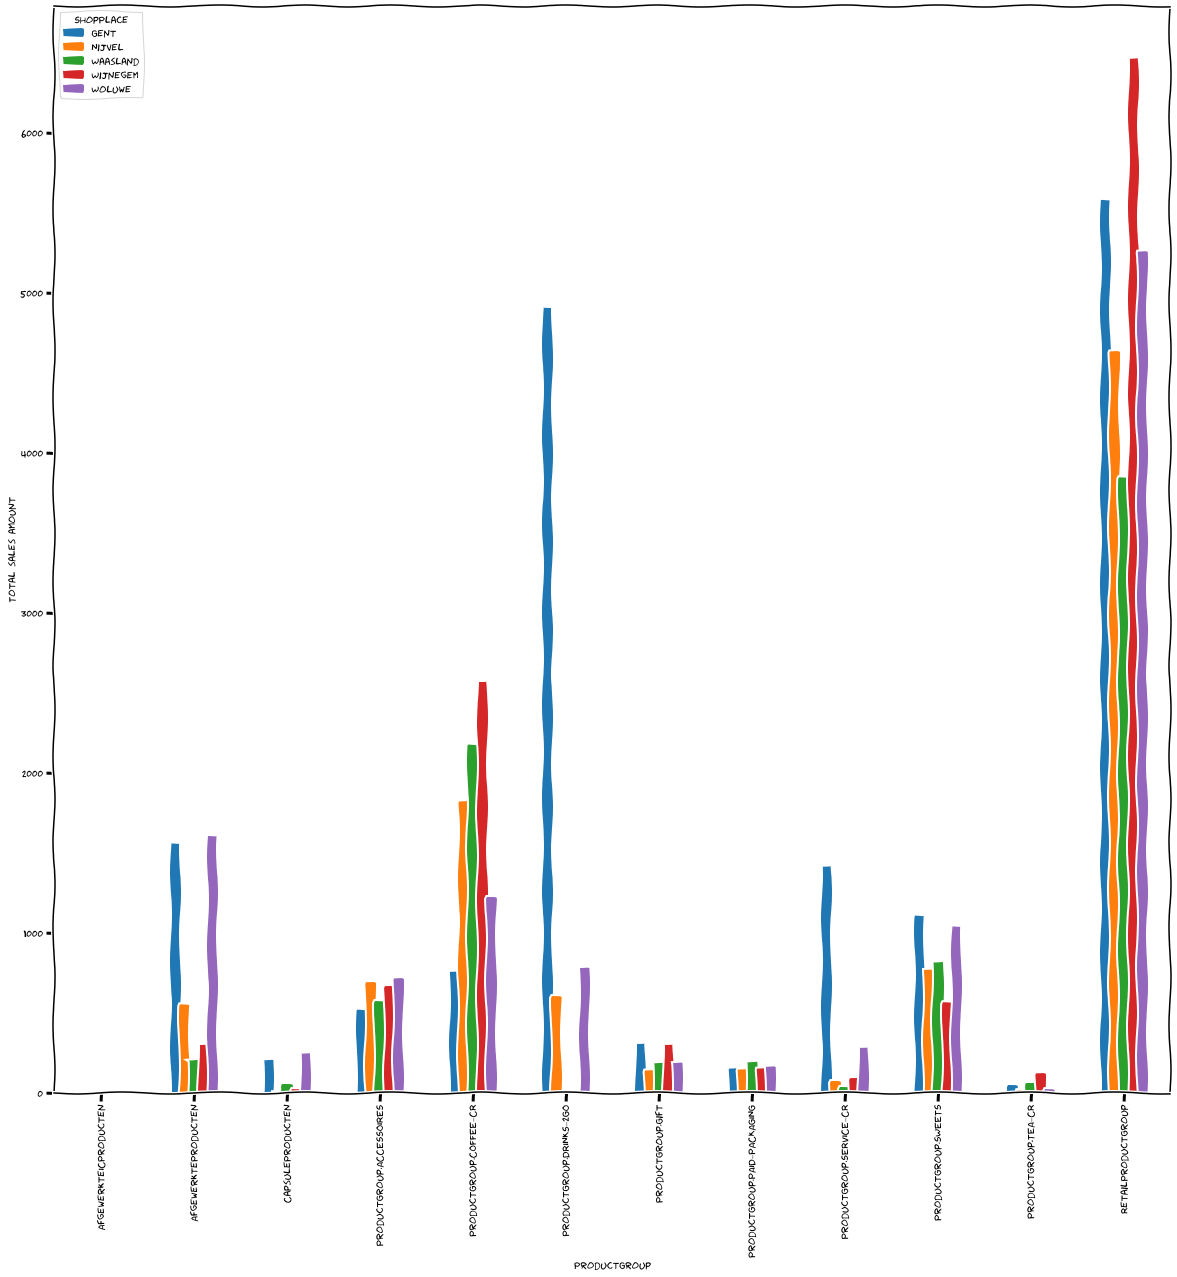

In [ ]:
df.groupby('ShopPlace').ProductGroup.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales amount')

### Evaluate the performance across all locations by Total selling amount and week day

In [ ]:
# add column day of week
dayOfWeek={0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
df['day']= pd.to_datetime(df['OrderDate']).dt.dayofweek.map(dayOfWeek)

In [ ]:
df2 = df.groupby(['ShopPlace']).day.value_counts().unstack(0)
df2

ShopPlace,Gent,Nijvel,Waasland,Wijnegem,Woluwe
day,,,,,
Friday,2788.0,1888.0,1465.0,2095.0,1868.0
Monday,2034.0,909.0,864.0,1472.0,1218.0
Saturday,4306.0,2669.0,2664.0,2642.0,3632.0
Sunday,117.0,134.0,NaN,574.0,219.0
Thursday,2458.0,1162.0,935.0,1431.0,1624.0
Tuesday,2328.0,1117.0,989.0,1584.0,1412.0
Wednesday,2564.0,1568.0,1238.0,1491.0,1572.0


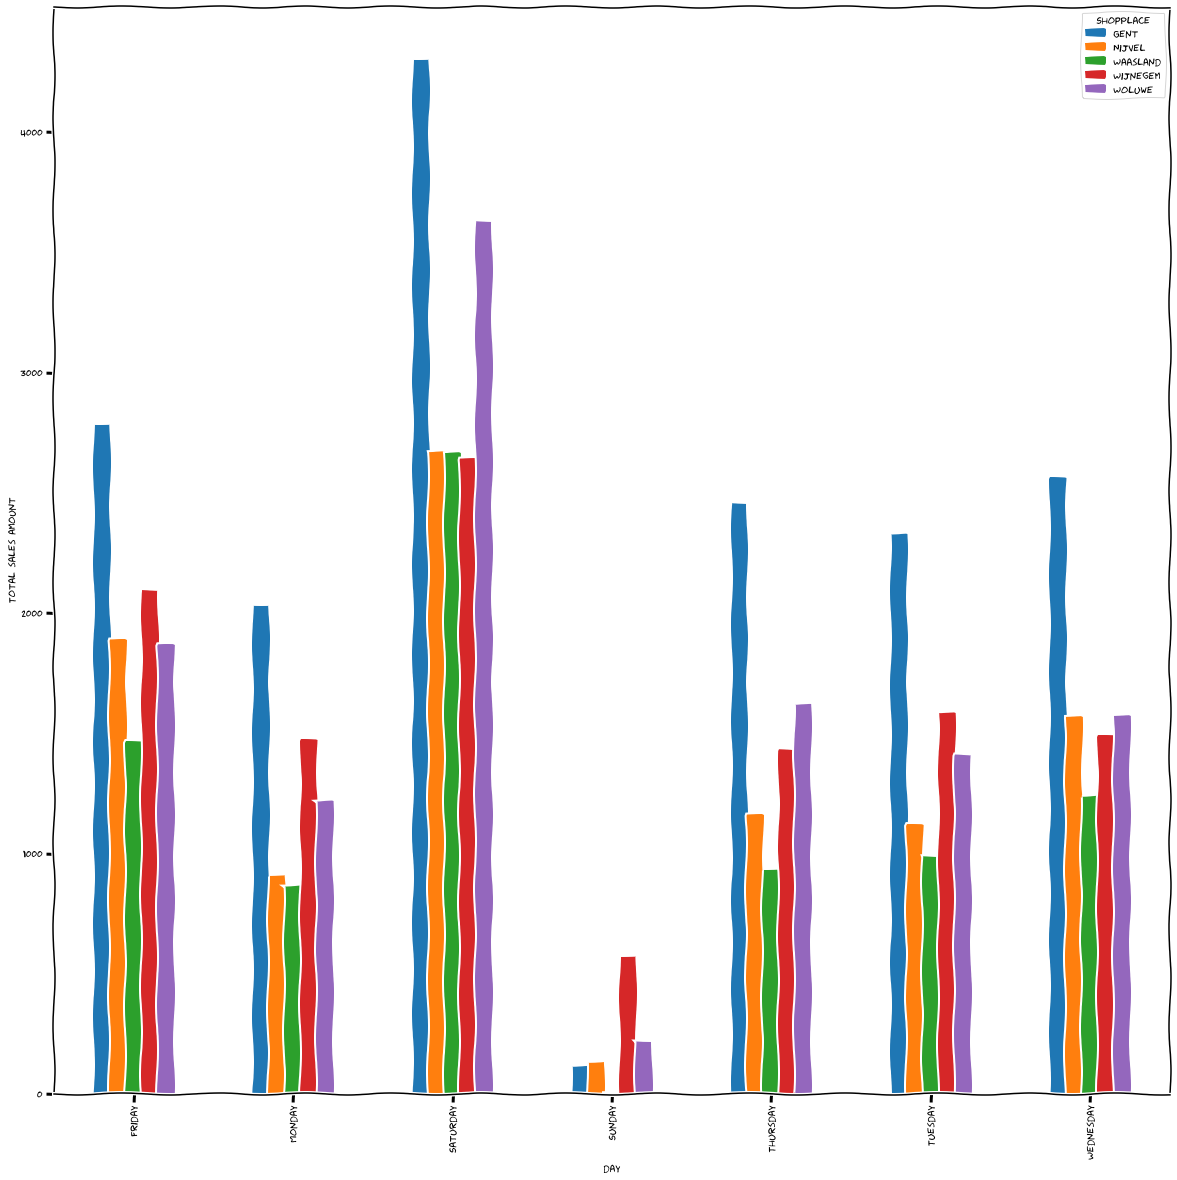

In [ ]:
df.groupby('ShopPlace').day.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales amount')

In [ ]:
df.SalesType.value_counts()

SalesOrderType.shop-sale      53678
SalesOrderType.online-sale     3353
Name: SalesType, dtype: int64

### Evaluate the performance across all locations by Total selling amount and part of day(Morning, Afternoon, Evening, Night)

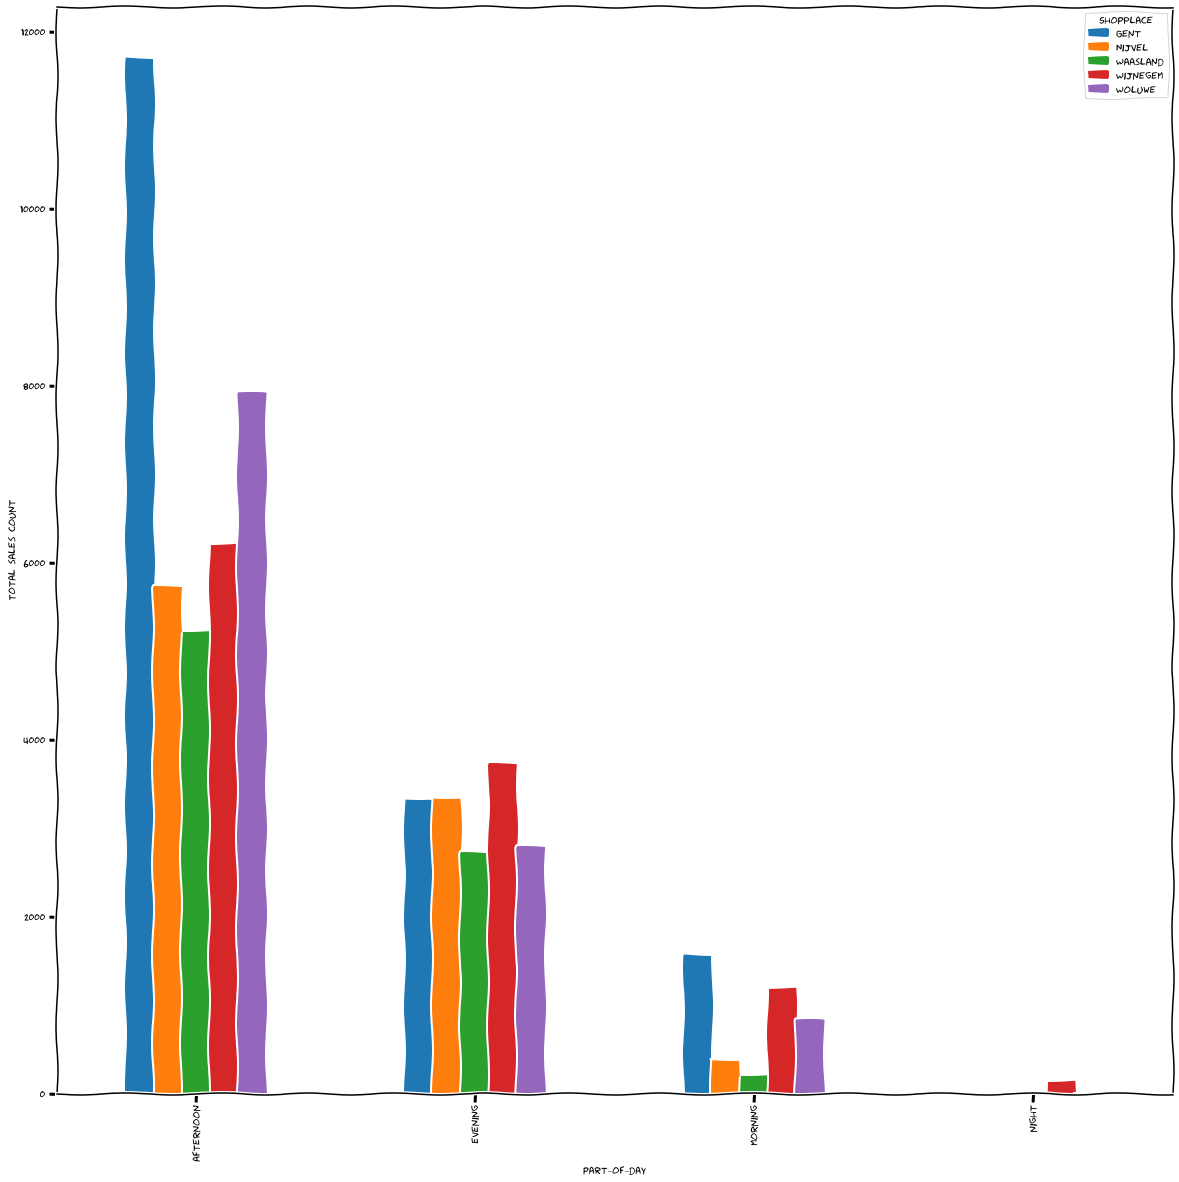

In [ ]:
df.groupby('ShopPlace').part_of_day.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales count')

# Question 2

Did the locations exhibit different buying behaviors?

### Evaluate the performance across all locations by Total selling amount and product group

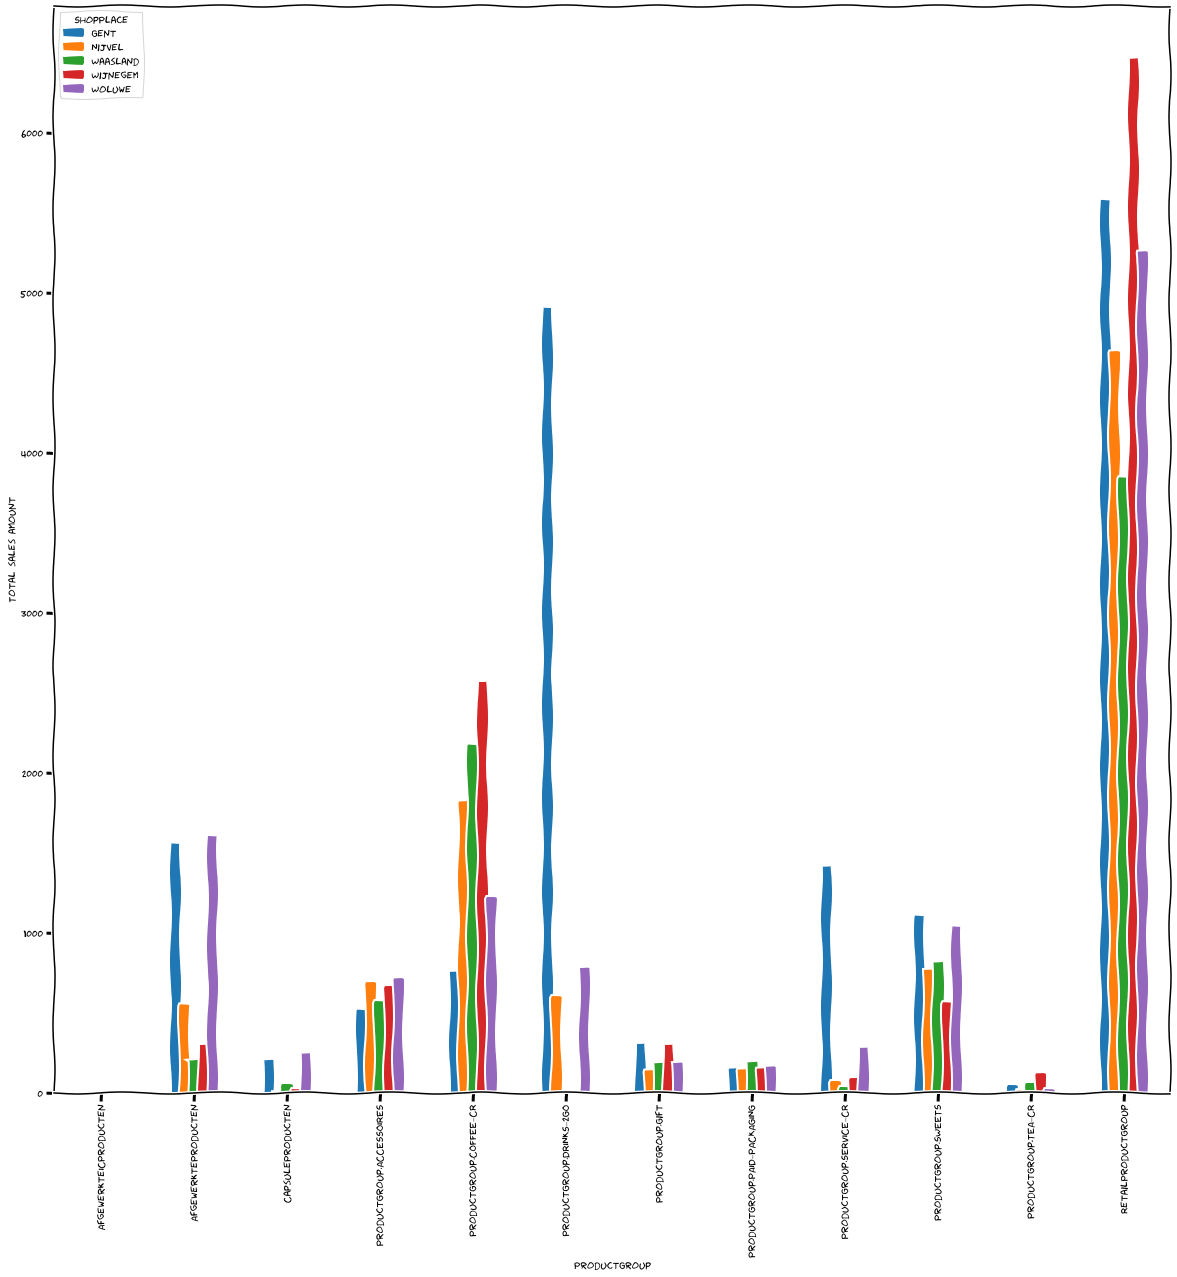

In [ ]:
df.groupby('ShopPlace').ProductGroup.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales amount')

### Evaluate the performance across all locations by Total selling amount and week day

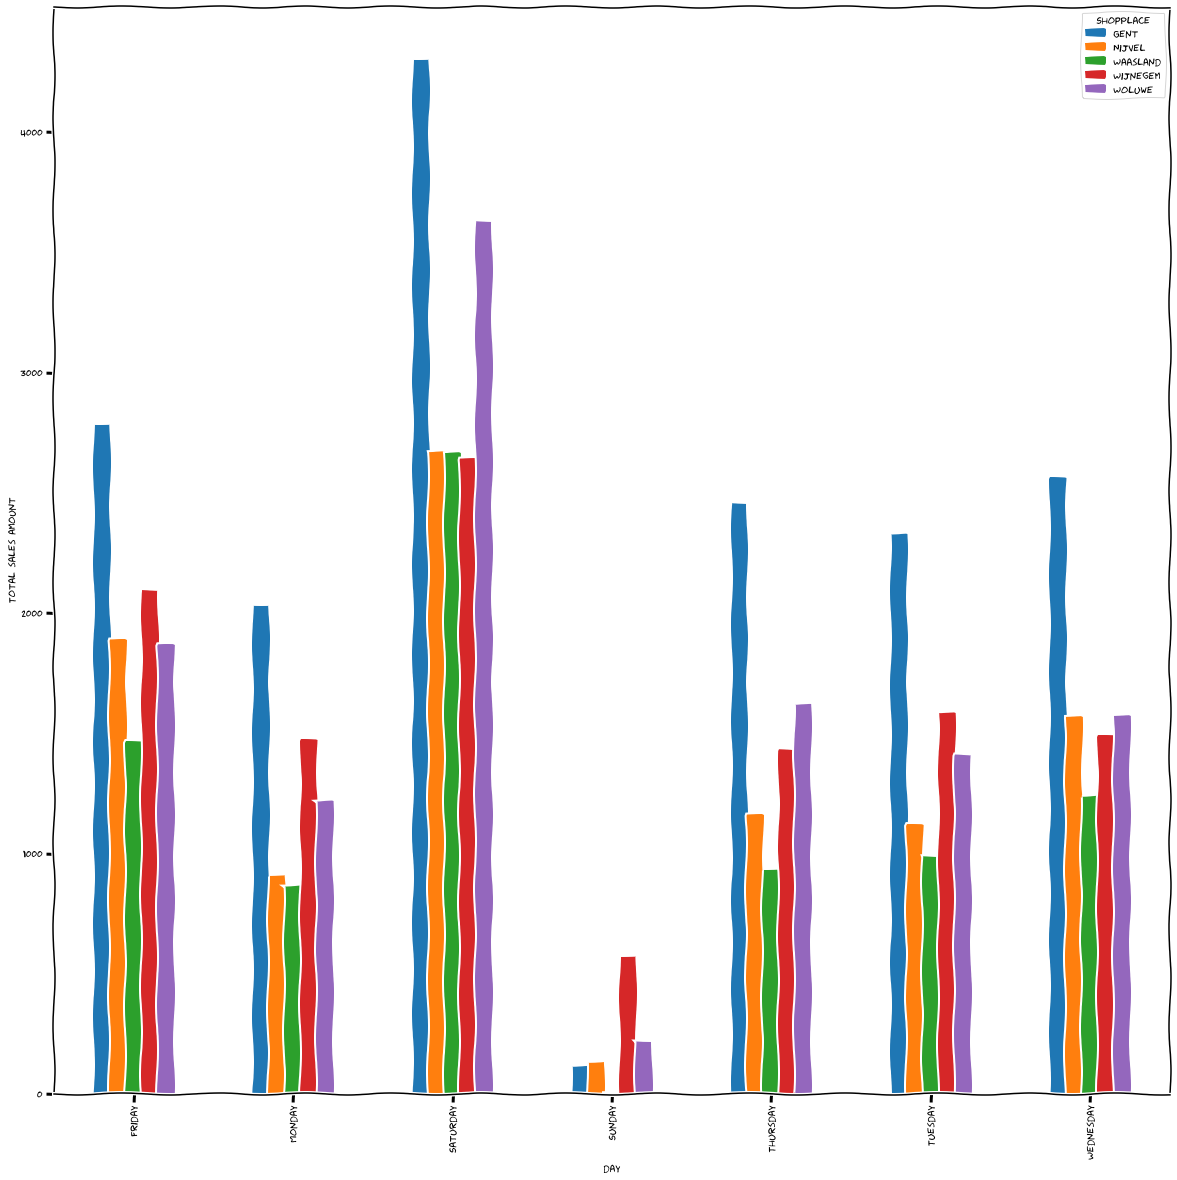

In [ ]:
df.groupby('ShopPlace').day.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales amount')

### Evaluate the performance across all locations by Total selling amount and part of day(Morning, Afternoon, Evening, Night)

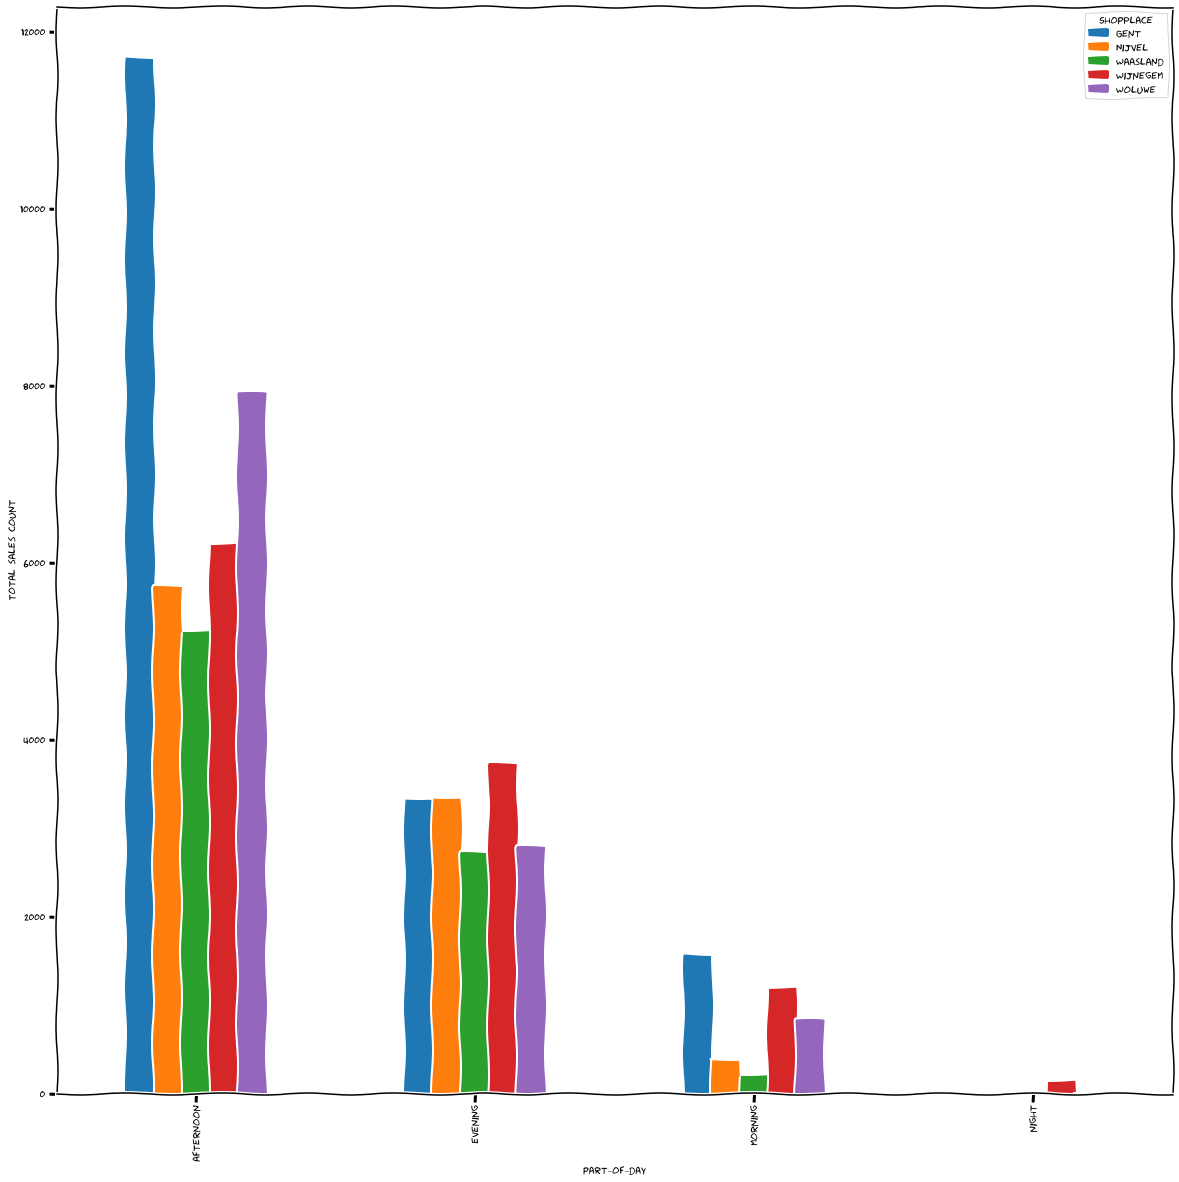

In [ ]:
df.groupby('ShopPlace').part_of_day.value_counts().unstack(0).plot(kind='bar', figsize=(20, 20), ylabel='Total sales count')

Between all locations we can see following patterns

- Gent is sucessful location it is return high turn over in each days
- Nijvel is unsucessful location because it have low turn over among other locations

- Retail product group product Item is suceesfull selling item, because it seeling highly in all locations
- second rank for Coffe_CR product group products highly selling among all locations
- Drinks_2GO show drastic demand in Gent location than other locations
- AfgewerkteICProducten this product item is not demand in any location

- Saturday have high demand for All location coffee shops
- Sunday is the worst case when compare with the sales among other days in each locations

- In afternoon (12.00pm to 5.00pm) time Peak demand for all locations than other part of day
- Night time (10.00pm to 5.00am) is the worst case because most of the locations don't have any selling on that time

# Question 3

In [ ]:
df.customercity.value_counts()

-                   31644
Gent                 2081
Sint-Niklaas         1081
Monstreux             962
Brussel               883
                    ...  
Wanfercée-Baulet        1
Merksplas               1
Steenokkerzeel          1
Heis-Op-Den-Berg        1
Zandlviet               1
Name: customercity, Length: 483, dtype: int64

Most of the buying customers from Gent

# Question 4

This is not good move, Because we don't have any user data with their preferences, like User id, user rating for products and etc.

So here we can't recommend anything as collabrative filtering way.

Hence this is not good way.

We need following additional data's
- Uesr data (user id, name, ..., demographic data)
- user and product relationship map (user id, product id, user comments / review)

# Question 5

In [ ]:
df.OrderDate

0       2020-10-16 20:23:31
1       2020-10-16 15:06:52
2       2020-10-19 15:07:16
3       2020-10-27 13:23:39
4       2020-10-26 19:07:25
                ...        
57026   2021-07-05 14:13:48
57027   2021-07-05 14:13:48
57028   2021-07-06 16:53:14
57029   2021-07-06 16:27:19
57030   2021-07-07 17:18:14
Name: OrderDate, Length: 57031, dtype: datetime64[ns]

In [ ]:
df_time_series = df.set_index('OrderDate')

In [ ]:
df_time_series.head()

,ShopCode,ShopPlace,SalesType,SalesOrderNo,Quantity,UnitOfMeasurement,TotalPrice,UnitPrice,customeraddress,ProductNo,ProductDescription,ProductGroup,productgroup1,productgroup2,productgroup3,customercity,CountryCode,vatamount,hour,part_of_day,day
OrderDate,,,,,,,,,,,,,,,,,,,,,
2020-10-16 20:23:31,CAB0003,Gent,SalesOrderType.shop-sale,126076,0.105,uom.vp,2.640001,23.7143,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.15,20,evening,Friday
2020-10-16 15:06:52,CAB0003,Gent,SalesOrderType.shop-sale,126049,0.200,uom.vp,5.020000,23.7000,-,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,-,BE,0.28,15,afternoon,Friday
2020-10-19 15:07:16,CAB0003,Gent,SalesOrderType.shop-sale,126139,0.250,uom.vp,6.280000,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,15,afternoon,Monday
2020-10-27 13:23:39,CAB0003,Gent,SalesOrderType.shop-sale,126395,0.250,uom.vp,6.280000,23.6800,NaN,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,NaN,BE,0.36,13,afternoon,Tuesday
2020-10-26 19:07:25,CAB0003,Gent,SalesOrderType.shop-sale,126387,0.250,uom.vp,6.280000,23.6800,Francois bernadstraat 20,AK00013002,Java d'Oro BN 1/1,AfgewerkteProducten,NaN,NaN,NaN,Gent,BE,0.36,19,evening,Monday


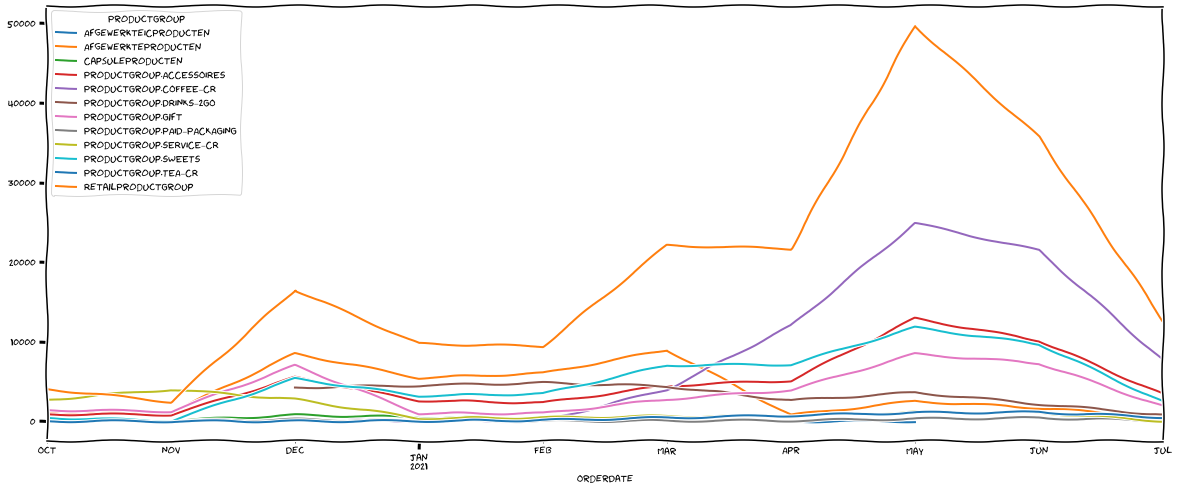

In [ ]:
df_time_series.groupby('ProductGroup').resample("M").sum().unstack(0).TotalPrice.plot(figsize=(20, 8))

In [ ]:
RetailProductGroup = df_time_series[df_time_series.ProductGroup == 'RetailProductGroup']['TotalPrice']
coffee_cr = df_time_series[df_time_series.ProductGroup == 'ProductGroup.COFFEE_CR']['TotalPrice']


RetailProductGroup_std = RetailProductGroup.std()
coffee_cr_std = coffee_cr.std()

In [ ]:
pval = ttest_ind(RetailProductGroup_std, coffee_cr_std)[1]

print("p-value", pval)
if pval <0.05:
    print("we reject null hypothesis")
else:
    print("we accept null hypothesis")

p-value nan
we accept null hypothesis


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3622: RuntimeWarning: Degrees of freedom <= 0 for slice
  **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


the value of p-value means the average total of RetailProductGroup coffee product and ProductGroup.COFFEE_CR is the same

the RetailProductGroup coffee product and ProductGroup.COFFEE_CR have same selling behaviors

So we can therby invest in both RetailProductGroup coffee products and ProductGroup.COFFEE_CR

# Question 6

We can find following things are data transformation for future insights

- Change all unit of measurements are same and calculate the price,  this is keep all unit price in same scale.
- Normalize prize scales to 0 - 1 range (min max scaler)
- fill the customer city missing values